In [99]:
#step2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [100]:
df=pd.read_csv('/Users/lengochuynh/Downloads/gold_price_1969-2022 - gold_price_1969-2022.csv').astype('float32')

In [101]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   54 non-null     float32
 1   Average Closing Price  54 non-null     float32
dtypes: float32(2)
memory usage: 564.0 bytes


In [102]:
#step 3
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])
    

In [103]:
# Xây dựng mô hình DNN
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [104]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [105]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
2/2 [==============================] - 0s 43ms/step - loss: 397833.9688 - val_loss: 487266.4375
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 426835.4375 - val_loss: 427099.4375
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 355270.7500 - val_loss: 376564.3750
Epoch 4/50
2/2 [==============================] - 0s 10ms/step - loss: 313776.5000 - val_loss: 341528.4375
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 216083.2656 - val_loss: 320463.7812
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 313838.0938 - val_loss: 308552.5000
Epoch 7/50
2/2 [==============================] - 0s 10ms/step - loss: 231122.2969 - val_loss: 299682.9375
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 239773.8750 - val_loss: 293823.1250
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 259676.3750 - val_loss: 290259.4688
Epoch 10/50
2/2 [=======================

In [106]:
# Evaluate the model on the test set
loss = model.evaluate(x_val, y_val)
print(f'Mean Squared Error on Test Set: {loss}')


1/1 [==============================] - 0s 18ms/step - loss: 397781.3125
Mean Squared Error on Test Set: 397781.3125


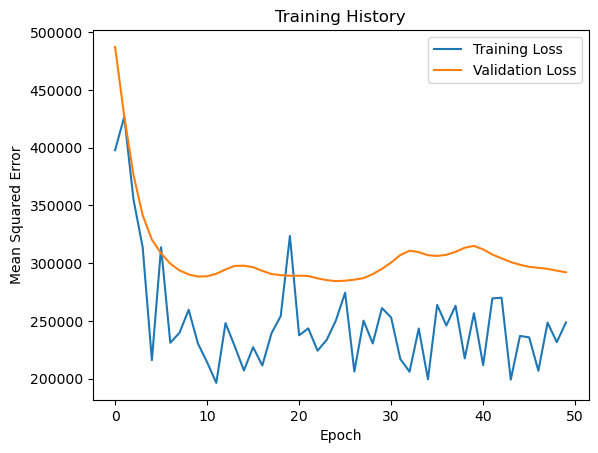

In [107]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


2/2 [==============================] - 0s 1ms/step


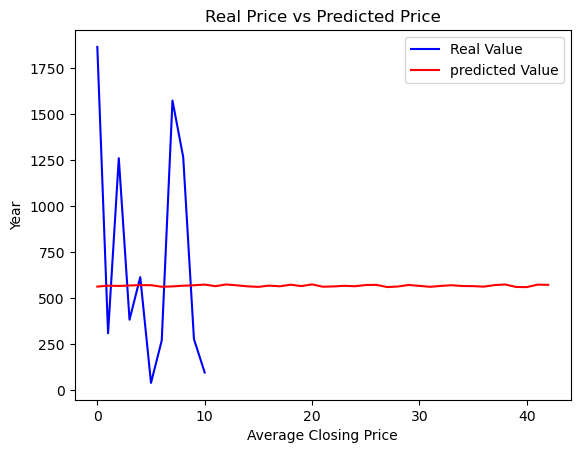

In [110]:
#Biểu đồ so sánh giá thực và dự đoán
predic = model.predict(x_train)
plt.plot(y_val, color='blue', label= 'Real Value')
plt.plot(predic, color='red', label='predicted Value')
plt.title('Real Price vs Predicted Price')
plt.xlabel('Average Closing Price')
plt.ylabel('Year')
plt.legend()
plt.show()